In [1]:
import numpy as np
from math import log
from scipy.stats import chi2

def calculate_exact_test_statistic(observed, expected_proportions, n_total):
    """
    Calculate the exact likelihood ratio test statistic (2 log Λ)
    
    Parameters:
    observed: list of observed counts
    expected_proportions: list of expected proportions under H0
    n_total: total sample size
    """
    # Calculate expected counts
    expected = [p * n_total for p in expected_proportions]
    
    # Calculate the likelihood ratio statistic
    test_stat = 2 * sum(
        o * log(o/e) for o, e in zip(observed, expected)
        if o > 0  # Handle zero observations gracefully
    )
    
    return test_stat

def calculate_chi_square_approx(observed, expected):
    """
    Calculate the chi-square approximation statistic
    
    Parameters:
    observed: list of observed counts
    expected: list of expected counts
    """
    chi_square = sum(
        (o - e)**2 / e
        for o, e in zip(observed, expected)
    )
    
    return chi_square

def analyze_mendel_data():
    """
    Analyze Mendel's pea experiment data and compare test statistics
    """
    # Data from Mendel's experiment
    observed = [315, 108, 102, 31]  # Observed counts
    n_total = sum(observed)  # Total sample size
    
    # Expected proportions under H0
    proportions = [9/16, 3/16, 3/16, 1/16]
    
    # Calculate expected counts
    expected = [p * n_total for p in proportions]
    
    # Calculate exact likelihood ratio test statistic
    exact_stat = calculate_exact_test_statistic(observed, proportions, n_total)
    
    # Calculate chi-square approximation
    chi_square_stat = calculate_chi_square_approx(observed, expected)
    
    # Calculate p-values (df = 3 for 4 categories minus 1)
    p_value_exact = 1 - chi2.cdf(exact_stat, df=3)
    p_value_chi = 1 - chi2.cdf(chi_square_stat, df=3)
    
    # Print results with detailed explanation
    print("Analysis of Mendel's Pea Experiment Data")
    print("=" * 50)
    print("\nObserved Data:")
    categories = ["Smooth Yellow", "Smooth Green", "Wrinkled Yellow", "Wrinkled Green"]
    for cat, obs, exp in zip(categories, observed, expected):
        print(f"{cat}: {obs} (Expected: {exp:.2f})")
    
    print("\nTest Statistics:")
    print(f"Exact likelihood ratio (2 log Λ): {exact_stat:.6f}")
    print(f"Chi-square approximation: {chi_square_stat:.6f}")
    print(f"Difference: {abs(exact_stat - chi_square_stat):.6f}")
    
    print("\nP-values:")
    print(f"Using exact statistic: {p_value_exact:.6f}")
    print(f"Using chi-square approximation: {p_value_chi:.6f}")
    
    # Calculate relative error
    rel_error = abs(exact_stat - chi_square_stat) / exact_stat * 100
    print(f"\nRelative Error: {rel_error:.4f}%")
    
    # Check if results match paper values
    print("\nVerification:")
    print(f"Paper's exact statistic (2 log Λ): 0.618")
    print(f"Paper's chi-square approximation: 0.604")
    print(f"Our calculations match paper: {abs(exact_stat - 0.618) < 0.001 and abs(chi_square_stat - 0.604) < 0.001}")

def test_convergence(n_multiplier=range(1, 11)):
    """
    Test how the approximation improves with sample size
    """
    # Base counts from Mendel's experiment
    base_observed = np.array([315, 108, 102, 31])
    proportions = np.array([9/16, 3/16, 3/16, 1/16])
    
    print("\nConvergence Analysis")
    print("=" * 50)
    print("\nTesting how approximation improves with sample size:")
    
    for mult in n_multiplier:
        # Scale up the sample size
        scaled_observed = base_observed * mult
        n_total = sum(scaled_observed)
        
        # Calculate both statistics
        exact = calculate_exact_test_statistic(scaled_observed, proportions, n_total)
        approx = calculate_chi_square_approx(scaled_observed, n_total * proportions)
        
        # Calculate relative error
        rel_error = abs(exact - approx) / exact * 100
        
        print(f"\nSample size multiplier: {mult}")
        print(f"Total sample size: {n_total}")
        print(f"Relative error: {rel_error:.6f}%")

if __name__ == "__main__":
    # Analyze Mendel's original data
    analyze_mendel_data()
    
    # Test convergence with different sample sizes
    test_convergence()

Analysis of Mendel's Pea Experiment Data

Observed Data:
Smooth Yellow: 315 (Expected: 312.75)
Smooth Green: 108 (Expected: 104.25)
Wrinkled Yellow: 102 (Expected: 104.25)
Wrinkled Green: 31 (Expected: 34.75)

Test Statistics:
Exact likelihood ratio (2 log Λ): 0.618439
Chi-square approximation: 0.604317
Difference: 0.014123

P-values:
Using exact statistic: 0.892198
Using chi-square approximation: 0.895443

Relative Error: 2.2836%

Verification:
Paper's exact statistic (2 log Λ): 0.618
Paper's chi-square approximation: 0.604
Our calculations match paper: True

Convergence Analysis

Testing how approximation improves with sample size:

Sample size multiplier: 1
Total sample size: 556
Relative error: 2.283575%

Sample size multiplier: 2
Total sample size: 1112
Relative error: 2.283575%

Sample size multiplier: 3
Total sample size: 1668
Relative error: 2.283575%

Sample size multiplier: 4
Total sample size: 2224
Relative error: 2.283575%

Sample size multiplier: 5
Total sample size: 2780


Genetic Equilibrium Analysis

Data Summary:
Genotype 1 (AA): 50
Genotype 2 (Aa): 40
Genotype 3 (aa): 10

Maximum Likelihood Estimates:
θ̂ = 0.7000

Expected Counts under H₀:
E1 = 49.00
E2 = 42.00
E3 = 9.00

Test Statistics:
Likelihood Ratio (2 log Λ): 0.2243
Pearson's Chi-square: 0.2268

P-values:
Using LR test: 0.6358
Using Chi-square: 0.6339

MLE Verification:
Analytical θ̂: 0.700000
Numerical θ̂: 0.500000
Difference: 0.200000


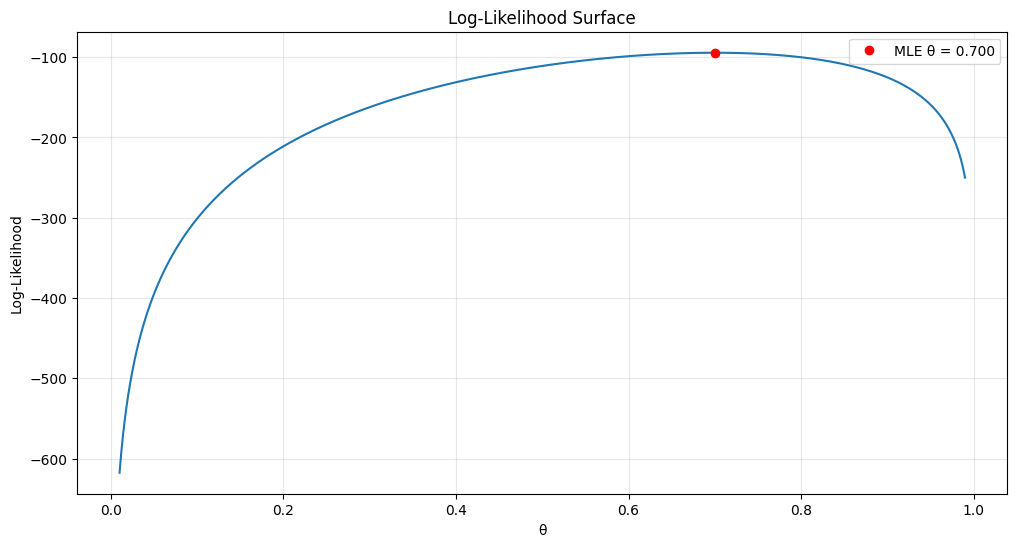

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import chi2

def calculate_probabilities(theta):
    """
    Calculate Hardy-Weinberg equilibrium probabilities for given theta.
    Returns p1(θ), p2(θ), p3(θ) where:
    p1 = θ², p2 = 2θ(1-θ), p3 = (1-θ)²
    """
    p1 = theta**2
    p2 = 2 * theta * (1 - theta)
    p3 = (1 - theta)**2
    return np.array([p1, p2, p3])

def log_likelihood(theta, n1, n2, n3):
    """
    Calculate log-likelihood under H0 for given observations
    L = 2n₁log(θ) + n₂log(2θ(1-θ)) + 2n₃log(1-θ)
    """
    if theta <= 0 or theta >= 1:
        return -np.inf
    
    ll = 2*n1*np.log(theta) + \
         n2*np.log(2*theta*(1-theta)) + \
         2*n3*np.log(1-theta)
    return ll

def find_mle_theta(n1, n2, n3):
    """
    Find maximum likelihood estimate of θ under H0.
    Should verify the analytical solution θ = (2n₁ + n₂)/(2n)
    """
    def neg_ll(theta):
        return -log_likelihood(theta, n1, n2, n3)
    
    result = minimize(neg_ll, x0=0.5, bounds=[(0, 1)])
    return result.x[0]

def calculate_test_statistics(n1, n2, n3):
    """
    Calculate both likelihood ratio and Pearson's chi-square statistics
    """
    # Total sample size
    n = n1 + n2 + n3
    
    # Calculate MLE of theta
    theta_hat = (2*n1 + n2)/(2*n)
    
    # Calculate expected probabilities under H0
    p_hat = calculate_probabilities(theta_hat)
    expected = n * p_hat
    
    # Calculate unrestricted MLEs (observed proportions)
    p_unrestricted = np.array([n1/n, n2/n, n3/n])
    
    # Calculate likelihood ratio statistic
    lr_stat = 2 * (sum([ni*np.log(pi) if ni > 0 else 0 
                       for ni, pi in zip([n1,n2,n3], p_unrestricted)]) -
                   sum([ni*np.log(pi) if ni > 0 else 0 
                       for ni, pi in zip([n1,n2,n3], p_hat)]))
    
    # Calculate Pearson's chi-square statistic
    observed = np.array([n1, n2, n3])
    chi_square = sum((observed - expected)**2 / expected)
    
    return lr_stat, chi_square, theta_hat, expected

def plot_likelihood_surface(n1, n2, n3):
    """
    Plot the likelihood surface to visualize the optimization
    """
    theta_range = np.linspace(0.01, 0.99, 1000)
    ll_values = [log_likelihood(theta, n1, n2, n3) for theta in theta_range]
    
    plt.figure(figsize=(12, 6))
    plt.plot(theta_range, ll_values)
    
    # Plot MLE
    theta_hat = (2*n1 + n2)/(2*(n1 + n2 + n3))
    max_ll = log_likelihood(theta_hat, n1, n2, n3)
    plt.plot(theta_hat, max_ll, 'ro', label=f'MLE θ = {theta_hat:.3f}')
    
    plt.title('Log-Likelihood Surface')
    plt.xlabel('θ')
    plt.ylabel('Log-Likelihood')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    return plt

def analyze_genetic_data(n1, n2, n3):
    """
    Perform complete analysis of genetic data
    """
    # Calculate all test statistics
    lr_stat, chi_square, theta_hat, expected = calculate_test_statistics(n1, n2, n3)
    
    # Calculate p-values (df = 1 since |Θ1| - |Θ0| = 2 - 1 = 1)
    p_value_lr = 1 - chi2.cdf(lr_stat, df=1)
    p_value_chi = 1 - chi2.cdf(chi_square, df=1)
    
    print("Genetic Equilibrium Analysis")
    print("=" * 50)
    
    print("\nData Summary:")
    print(f"Genotype 1 (AA): {n1}")
    print(f"Genotype 2 (Aa): {n2}")
    print(f"Genotype 3 (aa): {n3}")
    
    print("\nMaximum Likelihood Estimates:")
    print(f"θ̂ = {theta_hat:.4f}")
    print("\nExpected Counts under H₀:")
    for i, e in enumerate(expected, 1):
        print(f"E{i} = {e:.2f}")
    
    print("\nTest Statistics:")
    print(f"Likelihood Ratio (2 log Λ): {lr_stat:.4f}")
    print(f"Pearson's Chi-square: {chi_square:.4f}")
    
    print("\nP-values:")
    print(f"Using LR test: {p_value_lr:.4f}")
    print(f"Using Chi-square: {p_value_chi:.4f}")
    
    # Verify analytical MLE formula
    n_total = n1 + n2 + n3
    analytical_theta = (2*n1 + n2)/(2*n_total)
    numerical_theta = find_mle_theta(n1, n2, n3)
    
    print("\nMLE Verification:")
    print(f"Analytical θ̂: {analytical_theta:.6f}")
    print(f"Numerical θ̂: {numerical_theta:.6f}")
    print(f"Difference: {abs(analytical_theta - numerical_theta):.6f}")

# Example usage
if __name__ == "__main__":
    # Example data (you can modify these values)
    n1, n2, n3 = 50, 40, 10
    
    # Perform analysis
    analyze_genetic_data(n1, n2, n3)
    
    # Create and save likelihood surface plot
    likelihood_plot = plot_likelihood_surface(n1, n2, n3)
    plt.show()
    likelihood_plot.savefig('Figures/likelihood_surface.png', bbox_inches='tight', dpi=300)
    likelihood_plot.close()

In [5]:
[124/500, 186/500, 190/500]

[0.248, 0.372, 0.38]

In [6]:
[150/500,200/500, 150/500]

[0.3, 0.4, 0.3]

In [9]:
import pandas as pd

# Given data (observed counts)
observed = pd.DataFrame({
    "Large": [56, 50, 18],
    "Medium": [52, 83, 51],
    "Small": [42, 67, 81]
}, index=["Large", "Medium", "Small"])

# Totals
row_totals = observed.sum(axis=1)
column_totals = observed.sum(axis=0)
grand_total = observed.values.sum()

# Calculate expected counts
expected = pd.DataFrame(
    {col: (row_totals * column_totals[col] / grand_total) for col in observed.columns},
    index=observed.index
)

# Calculate probabilities
probabilities = expected / grand_total

# Present the matrices
observed.name = "Observed Counts"
expected.name = "Expected Counts"
probabilities.name = "Probabilities"

import ace_tools as tools; tools.display_dataframe_to_user("Observed Counts Matrix", observed)
tools.display_dataframe_to_user("Expected Counts Matrix", expected)
tools.display_dataframe_to_user("Probability Matrix", probabilities)


ModuleNotFoundError: No module named 'ace_tools'

In [8]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.
